## Heart Disease Predictions

- [Article Link](https://www.kaggle.com/code/abohelal/nueral-network-regression-vs-sklearn-algorithms)

In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import models, layers, utils, backend as K
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report
import io

In [18]:
# Constaints:
INPUT_PATH = r'E:\random_data'
OUTPUT_PATH = r'E:\outputs'

In [19]:
df_main = pd.read_csv(INPUT_PATH + '\heart_disease_health_indicators_BRFSS2015.csv')

In [20]:
def analysis(df):
    
    
    print("------------DIMENSIONS ----------")
    print("Observation:", df.shape[0], "Column:", df.shape[1], "\n")

    print("--------------DTYPES------------- ")
    if len(df.select_dtypes("object").columns) > 0:
        print("Object Variables:", "\n", "variables:", 
              len(df.select_dtypes("object").columns), "\n", 
              df.select_dtypes("object").columns.tolist(), "\n")

    if len(df.select_dtypes("integer").columns) > 0:
        print("Integer Variables:", "\n", "variables:", 
              len(df.select_dtypes("integer").columns), "\n", 
              df.select_dtypes("integer").columns.tolist(), "\n")

    if len(df.select_dtypes("float").columns) > 0:
        print("Float Variables:", "\n", "variables:", 
              len(df.select_dtypes("float").columns), "\n", 
              df.select_dtypes("float").columns.tolist(), "\n")

    if len(df.select_dtypes("bool").columns) > 0:
        print("Bool Variables:", "\n", "variables:", 
              len(df.select_dtypes("bool").columns), "\n", 
              df.select_dtypes("bool").columns.tolist(), "\n")

    print("--------------MISSING VALUE----------")
    print("Any missing values? \n ", np.where(df.isnull().values.any() == False,  "No missing value❌", "Data includes missing value✔️"), "\n")

    buf = io.StringIO()
    df.info(buf=buf)
    info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
    print("--------------MEMORY USAGE------------ \n", info)
    
    return df

df = analysis(df_main)
df.head()

------------DIMENSIONS ----------
Observation: 253680 Column: 22 

--------------DTYPES------------- 
Float Variables: 
 variables: 22 
 ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'] 

--------------MISSING VALUE----------
Any missing values? 
  No missing value❌ 

--------------MEMORY USAGE------------ 
 42.6 MB


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

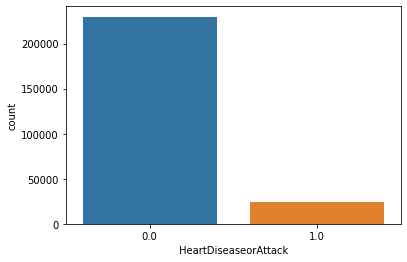

In [21]:
sns.countplot(data =df , x ='HeartDiseaseorAttack')

In [22]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:xlabel='Education', ylabel='BMI'>

C:\Users\proto\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


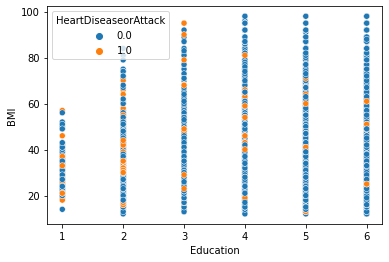

In [24]:
sns.scatterplot(data = df , x ='Education' , y ='BMI',hue = 'HeartDiseaseorAttack')

In [25]:
X = df.drop('HeartDiseaseorAttack',axis =1)
y = df['HeartDiseaseorAttack']

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X, y)

print('\nX Shape: ', {X.shape})
print('\ny Shape: ', {y.shape})
print('\nX_under Shape: ', {X_under.shape})
print('\ny_under Shape: ', {y_under.shape})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.20, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=3),
    tf.keras.callbacks.CSVLogger('model_logger.csv', separator = ",", append=False),
    tf.keras.callbacks.TensorBoard(log_dir= './logs')]

mod = tf.keras.Sequential([
  #tf.keras.layers.Dense(4,input_dim = len(X_train.columns), activation = 'relu'),    
  tf.keras.layers.Dense(10,input_dim = 21, activation = 'relu'),
  tf.keras.layers.Dense(5,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')])

mod.summary()
mod.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
training = mod.fit(X_train, y_train, batch_size=32, epochs = 50, verbose = 0, callbacks = [my_callbacks])
    
print(f'\n Test Accuracy -> {mod.evaluate(X_test, y_test)}')

y_pred = mod.predict(X_test)
y_pred = np.round(y_pred)


X Shape:  {(253680, 21)}

y Shape:  {(253680,)}

X_under Shape:  {(71679, 21)}

y_under Shape:  {(71679,)}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                220       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
448/448 [==============================] - 1s 1ms/step - loss: 0.4500 - accuracy: 0.7773

 Test Accuracy -> [0.45002874732017517, 0.7772740125656128]


In [26]:
def utils_nn_config(model):

    '''
    Extract info for each layer in a keras model.
    '''

    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers


def visualize_nn(model, description=False, figsize=(10,8)):
    
    '''
    Plot the structure of a keras neural network.
    '''

    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

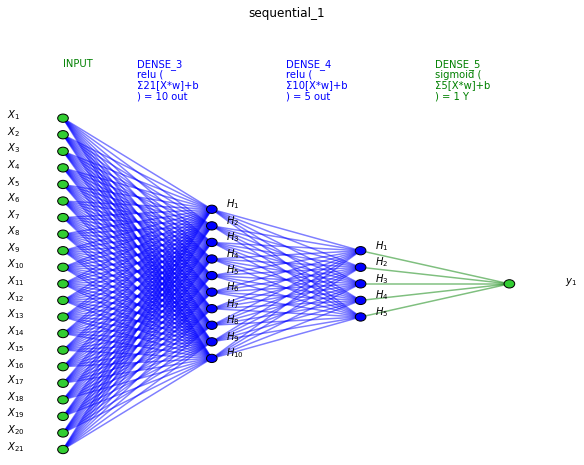

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [27]:
visualize_nn(mod, description=True, figsize=(10,8))

utils.plot_model(mod, to_file='model.png', show_shapes=True, show_layer_names=True)

report               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      9594
         1.0       0.67      0.65      0.66      4742

    accuracy                           0.78     14336
   macro avg       0.75      0.74      0.75     14336
weighted avg       0.78      0.78      0.78     14336



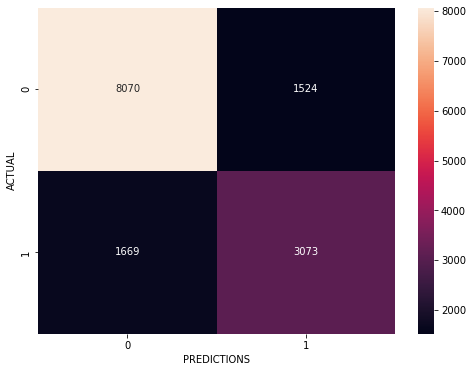

In [28]:
con = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
print(f'report {classification_report(y_test, y_pred)}')

plt.figure(figsize=(8,6))
sns.heatmap(con, annot = True, fmt = "d")
plt.xlabel("PREDICTIONS")
plt.ylabel("ACTUAL")
plt.show()

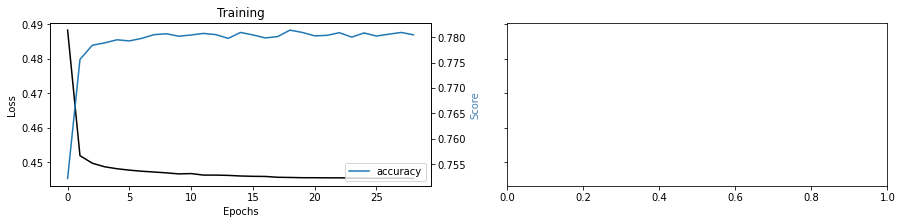

In [29]:
# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training    
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
 
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation    
#ax[1].set(title="Validation")
#ax22 = ax[1].twinx()
#ax[1].plot(training.history['val_loss'], color='black')
#ax[1].set_xlabel('Epochs')
#ax[1].set_ylabel('Loss', color='black')

#for metric in metrics:          
#    ax22.plot(training.history['val_'+metric], label=metric)
#    ax22.set_ylabel("Score", color="steelblue")
#plt.show()

In [30]:
y_hats2 = mod.predict(X)

df['Predictions'] = y_hats2

In [31]:
df.to_csv('full_data.csv')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, train_size=0.80)

# training = mod.fit(X_train, y_train, batch_size=32, epochs = 50, verbose = 0, callbacks = [my_callbacks])
training = mod.fit(X_train, y_train)
    
print(f'\n Test Accuracy -> {mod.evaluate(X_test, y_test)}')

y_hats = mod.predict(X_test)

y_test['preds'] = y_hats

df_out = pd.merge(df, y_test[['preds']], how = 'left', left_index = True, right_index = True)

448/448 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7412

 Test Accuracy -> [0.48888128995895386, 0.7412109375]


In [15]:
df_out.head()

,HeartDiseaseorAttack_x,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack_y
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
